# Automated Loan Application Processing
This notebook analyzes the structure and content of loan application documents to understand formatting, common terminologies, and document structure.
## 1. Setup and Dependencies
First, let's import the necessary libraries and set up our environment.

In [1]:
import json
import pandas as pd
from collections import Counter
import re
from typing import Dict, List, Any
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Download required NLTK data (only needed once)
nltk.download(['punkt_tab', 'stopwords', 'wordnet'])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sghas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sghas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sghas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Data Exploration & Preprocessing
### 2.1. Examine the Data
Let's load the loan application data from the JSON file.

In [2]:
def load_data(json_file: str = "loan_applications.json") -> List[Dict[str, Any]]:
    #Load the JSON data file
    with open(json_file, 'r') as f:
        return json.load(f)

# Load the data
data = load_data()
print(f"Loaded {len(data)} loan applications")

Loaded 100 loan applications


Let's examine the structure of a sample document to understand its organization.

In [3]:
def get_sample_document(data: List[Dict[str, Any]], index: int = 0) -> Dict[str, Any]:
    """Get a sample document for inspection"""
    return data[index]

# Get and display a sample document structure
sample = get_sample_document(data)
print("Document Structure:")
for key in sample.keys():
    print(f"- {key}")

Document Structure:
- application_id
- application_date
- personal_info
- employment_info
- financial_info
- loan_details


Now, we analyze the text fields in the documents to understand their content and patterns.

In [4]:
# Function to analyze text fields
def analyze_text_fields(data: List[Dict[str, Any]]) -> Dict[str, List[str]]:
    """Analyze all text fields in the documents"""
    text_fields = {
        'personal_statement': [],
        'career_narrative': [],
        'financial_statement': [],
        'debt_explanation': [],
        'purpose_statement': [],
        'repayment_plan': []
    }
    
    for app in data:
        personal_info = app['personal_info']
        employment_info = app['employment_info']
        financial_info = app['financial_info']
        loan_details = app['loan_details']
        
        text_fields['personal_statement'].append(personal_info['personal_statement'])
        text_fields['career_narrative'].append(employment_info['career_narrative'])
        text_fields['financial_statement'].append(financial_info['financial_statement'])
        text_fields['debt_explanation'].append(financial_info['debt_explanation'])
        text_fields['purpose_statement'].append(loan_details['purpose_statement'])
        text_fields['repayment_plan'].append(loan_details['repayment_plan'])
    
    return text_fields

# Function to analyze field lengths
def analyze_field_lengths(text_fields: Dict[str, List[str]]) -> Dict[str, Dict[str, float]]:
    """Analyze the length of text fields"""
    stats = {}
    for field, texts in text_fields.items():
        lengths = [len(text.split()) for text in texts]
        stats[field] = {
            'mean_length': sum(lengths) / len(lengths),
            'min_length': min(lengths),
            'max_length': max(lengths)
        }
    return stats

# Perform text field analysis
text_fields = analyze_text_fields(data)
field_lengths = analyze_field_lengths(text_fields)

In [5]:
# Function to extract common terms
def extract_common_terms(text_list: List[str], top_n: int = 10) -> List[tuple]:
    """Extract most common terms from a list of texts"""
    all_words = []
    for text in text_list:
        words = re.findall(r'\w+', text.lower())
        all_words.extend(words)
    
    common_words = {'the', 'and', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'my', 'i', 'is', 'are', 'be', 'this', 'that', 'have', 'has', 'had'}
    filtered_words = [word for word in all_words if word not in common_words]
    
    return Counter(filtered_words).most_common(top_n)

# Display text field statistics
print("Text Field Statistics:")
for field, stats in field_lengths.items():
    print(f"\n{field.replace('_', ' ').title()}:")
    print(f"Average length: {stats['mean_length']:.1f} words")
    print(f"Min length: {stats['min_length']} words")
    print(f"Max length: {stats['max_length']} words")
    
    common_terms = extract_common_terms(text_fields[field])
    print("\nMost common terms:")
    for term, count in common_terms:
        print(f"- {term}: {count}")

Text Field Statistics:

Personal Statement:
Average length: 32.2 words
Min length: 26 words
Max length: 41 words

Most common terms:
- loan: 100
- history: 80
- am: 67
- been: 67
- years: 67
- me: 66
- credit: 59
- stable: 57
- income: 46
- financial: 42

Career Narrative:
Average length: 25.9 words
Min length: 18 words
Max length: 41 words

Most common terms:
- years: 73
- experience: 73
- career: 65
- expertise: 48
- healthcare: 46
- developed: 38
- progression: 38
- reflects: 38
- commitment: 38
- throughout: 35

Financial Statement:
Average length: 25.0 words
Min length: 20 words
Max length: 32 words

Most common terms:
- financial: 67
- been: 66
- while: 66
- credit: 48
- savings: 42
- managing: 40
- finances: 40
- past: 40
- years: 40
- assets: 40

Debt Explanation:
Average length: 22.3 words
Min length: 18 words
Max length: 28 words

Most common terms:
- debt: 134
- obligations: 82
- current: 79
- managed: 46
- history: 35
- shows: 35
- successfully: 35
- continue: 35
- over: 33

Create visualizations to better understand the data patterns.

In [6]:
# Function to analyze loan types
def analyze_loan_types(data: List[Dict[str, Any]]) -> Dict[str, int]:
    """Analyze the distribution of loan types"""
    loan_types = [app['loan_details']['loan_type'] for app in data]
    return dict(Counter(loan_types))

# Analyze loan types
loan_types = analyze_loan_types(data)


Generating word clouds...


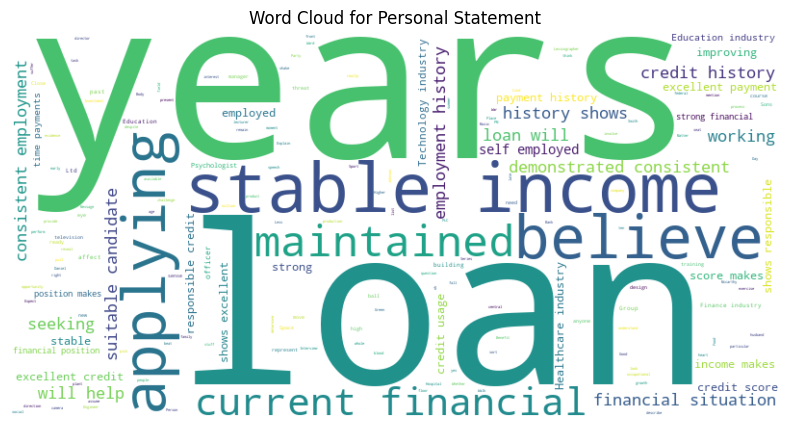

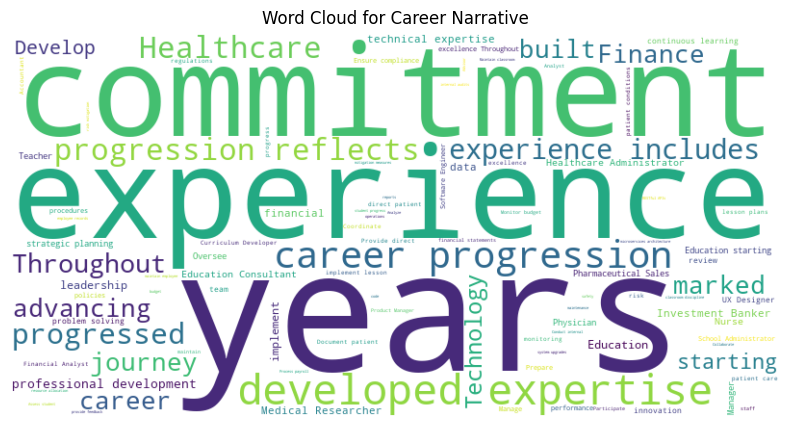

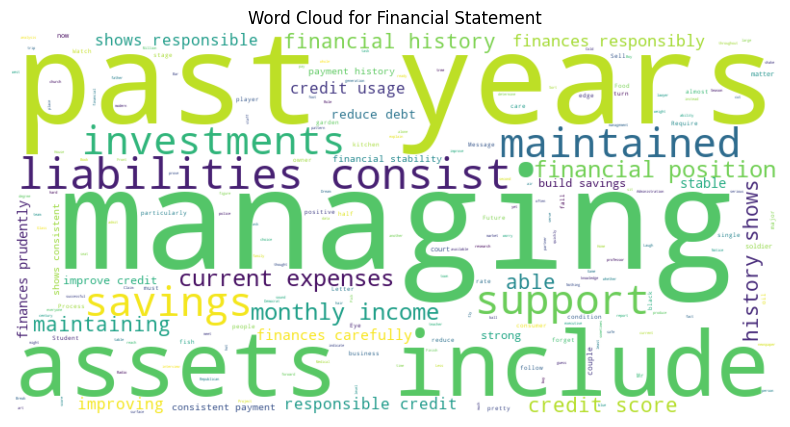

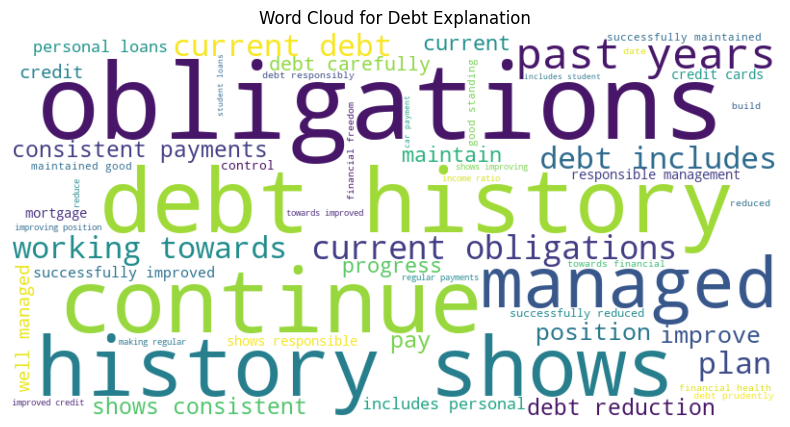

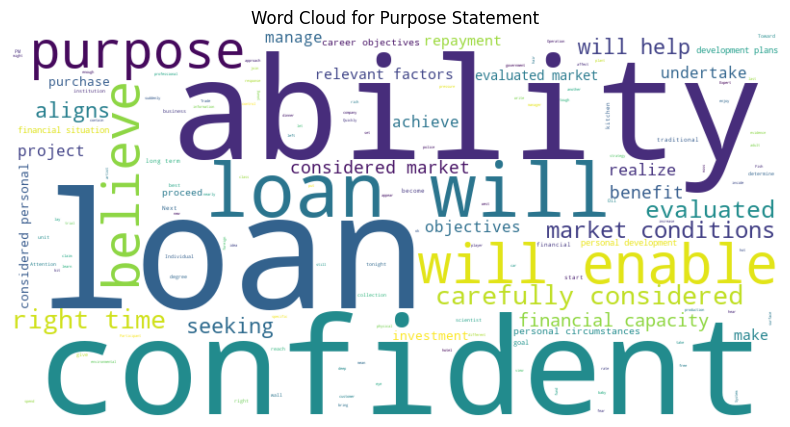

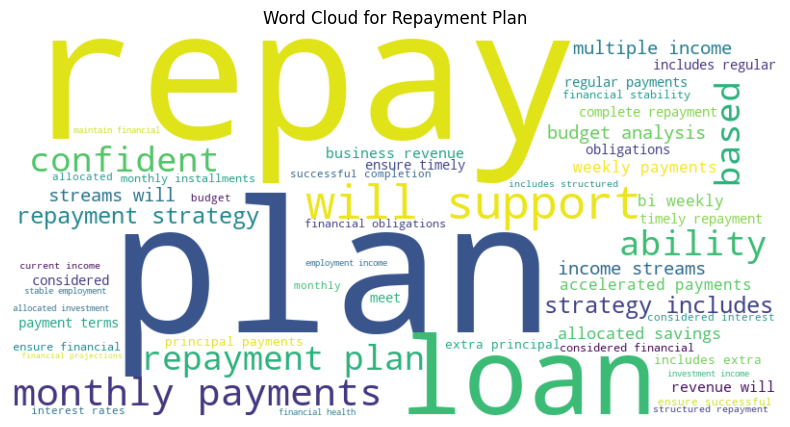

In [7]:
# Function to generate word cloud
def generate_word_cloud(text: str, title: str):
    """Generate a word cloud for a given text"""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds
print("\nGenerating word clouds...")
for field, texts in text_fields.items():
    combined_text = ' '.join(texts)
    generate_word_cloud(combined_text, f"Word Cloud for {field.replace('_', ' ').title()}")

Analyze the distribution of different loan types in the dataset.

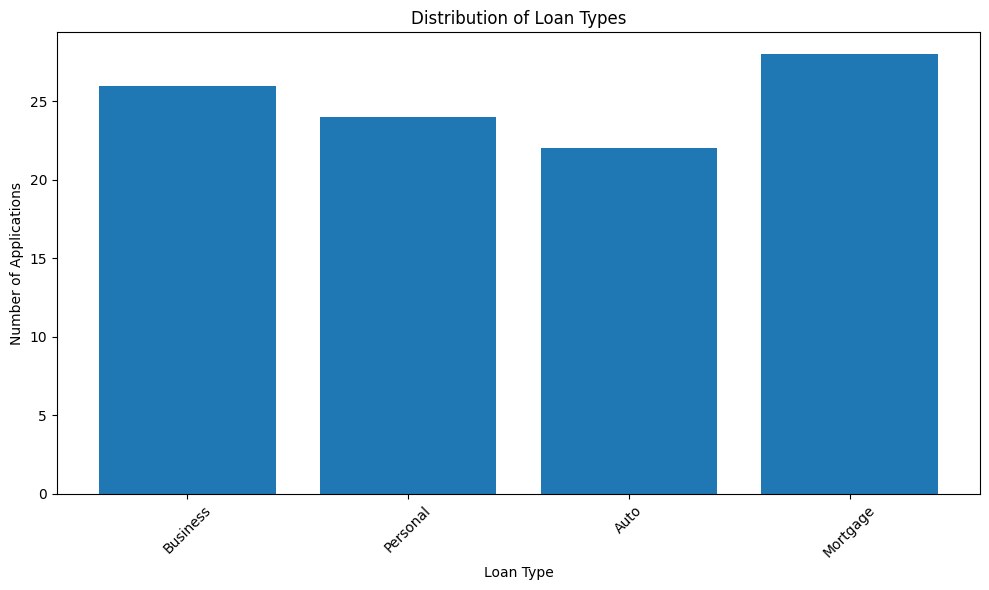


Loan Type Distribution:
Business: 26 applications
Personal: 24 applications
Auto: 22 applications
Mortgage: 28 applications


In [8]:
# Create loan type distribution plot
plt.figure(figsize=(10, 6))
plt.bar(loan_types.keys(), loan_types.values())
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print loan type distribution
print("\nLoan Type Distribution:")
for loan_type, count in loan_types.items():
    print(f"{loan_type}: {count} applications")

Now, we visualize the distribution of text lengths for each field.

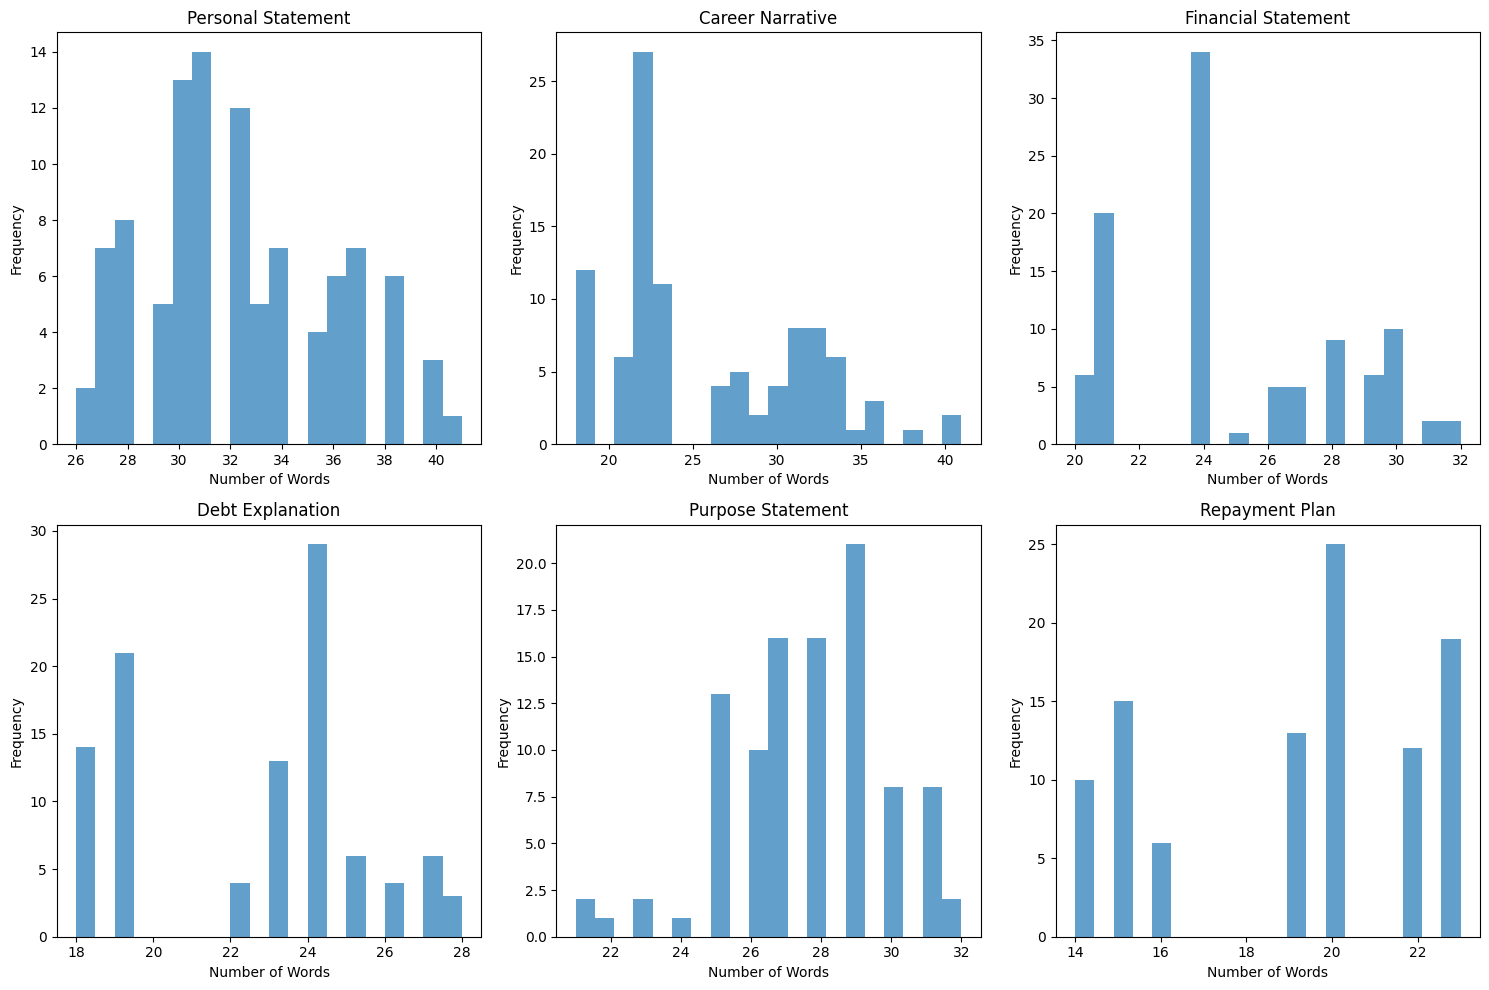

In [9]:
# Create text length distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (field, texts) in enumerate(text_fields.items()):
    lengths = [len(text.split()) for text in texts]
    axes[idx].hist(lengths, bins=20, alpha=0.7)
    axes[idx].set_title(field.replace('_', ' ').title())
    axes[idx].set_xlabel('Number of Words')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Create a summary table of the text field statistics.

In [10]:
# Create summary statistics table
stats_df = pd.DataFrame(field_lengths).T
stats_df.columns = ['Mean Length', 'Min Length', 'Max Length']
print("\nSummary Statistics:")
stats_df


Summary Statistics:


,Mean Length,Min Length,Max Length
personal_statement,32.25,26.0,41.0
career_narrative,25.88,18.0,41.0
financial_statement,24.98,20.0,32.0
debt_explanation,22.34,18.0,28.0
purpose_statement,27.60,21.0,32.0
repayment_plan,19.09,14.0,23.0


### 2.2. Text Cleaning and Preprocessing
#### Cleaning Strategy
1. **Text Normalization**:
   - Convert text to lowercase
   - Remove special characters and punctuation
   - Remove extra whitespace

2. **Tokenization**:
   - Split text into individual words
   - Handle contractions and special cases

3. **Stop Word Removal**:
   - Remove common English stop words
   - Remove custom stop words specific to loan applications

4. **Lemmatization**:
   - Convert words to their base form
   - Handle different verb tenses and noun forms

5. **Custom Cleaning**:
   - Remove numbers and currency symbols
   - Handle specific loan-related terms
   - Remove personal identifiers (if present)

Let's implement these cleaning steps and see the transformations.

First, we set up NLTK components and custom stop words.

In [11]:
# Initialize NLTK components
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Add custom stop words specific to loan applications
custom_stop_words = {
    'loan', 'application', 'please', 'thank', 'regards', 'sincerely',
    'dear', 'mr', 'mrs', 'ms', 'dr', 'applicant', 'bank', 'financial'
}
stop_words.update(custom_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sghas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


By this step, we create a refined stopword list optimized for processing loan documents by:

- Removing generic filler words

- Filtering out financial domain terms that appear too frequently to be meaningful

- Preparing for lemmatization in subsequent text processing steps


And then, we define text cleaning functions

In [12]:
def clean_text(text: str) -> str:
    """Clean and normalize text"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

def tokenize_and_lemmatize(text: str) -> List[str]:
    """Tokenize and lemmatize text"""
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    processed_tokens = []
    for token in tokens:
        if token not in stop_words and len(token) > 2:
            # Lemmatize
            lemma = lemmatizer.lemmatize(token)
            processed_tokens.append(lemma)
    
    return processed_tokens

def process_text_field(text: str) -> str:
    """Process a text field through all cleaning steps"""
    # Clean text
    cleaned_text = clean_text(text)
    
    # Tokenize and lemmatize
    tokens = tokenize_and_lemmatize(cleaned_text)
    
    # Join tokens back into text
    return ' '.join(tokens)

Show a before/after example of text cleaning

In [13]:
# Get a sample text for demonstration

sample_text = sample['personal_info']['personal_statement']
print("Original Text:")
print(sample_text)
print("\nCleaned Text:")
print(process_text_field(sample_text))

Original Text:
As a Ophthalmologist at Rios, Lynch and Wong, I have demonstrated consistent employment history. I am seeking this loan to Series space character test fall right opportunity. and believe my excellent credit score makes me a suitable candidate.

Cleaned Text:
ophthalmologist rio lynch wong demonstrated consistent employment history seeking series space character test fall right opportunity believe excellent credit score make suitable candidate


Process all text fields in the dataset

In [14]:
# Process all text fields in the dataset
def process_all_text_fields(data: List[Dict[str, Any]]) -> Dict[str, List[str]]:
    """Process all text fields in the dataset"""
    processed_fields = {
        'personal_statement': [],
        'career_narrative': [],
        'financial_statement': [],
        'debt_explanation': [],
        'purpose_statement': [],
        'repayment_plan': []
    }
    
    for app in data:
        personal_info = app['personal_info']
        employment_info = app['employment_info']
        financial_info = app['financial_info']
        loan_details = app['loan_details']
        
        processed_fields['personal_statement'].append(process_text_field(personal_info['personal_statement']))
        processed_fields['career_narrative'].append(process_text_field(employment_info['career_narrative']))
        processed_fields['financial_statement'].append(process_text_field(financial_info['financial_statement']))
        processed_fields['debt_explanation'].append(process_text_field(financial_info['debt_explanation']))
        processed_fields['purpose_statement'].append(process_text_field(loan_details['purpose_statement']))
        processed_fields['repayment_plan'].append(process_text_field(loan_details['repayment_plan']))
    
    return processed_fields

# Process all text fields
processed_text_fields = process_all_text_fields(data)

Compare word counts before and after processing

In [15]:
# Compare word counts before and after processing
def compare_word_counts(original_text: str, processed_text: str) -> Dict[str, int]:
    """Compare word counts before and after processing"""
    original_words = len(original_text.split())
    processed_words = len(processed_text.split())
    
    return {
        'original_words': original_words,
        'processed_words': processed_words,
        'reduction_percentage': ((original_words - processed_words) / original_words) * 100
    }

# Display comparison for each field
print("\nWord Count Comparison:")
for field in processed_text_fields.keys():
    original_text = sample['personal_info'][field] if field == 'personal_statement' else \
                   sample['employment_info'][field] if field in ['career_narrative'] else \
                   sample['financial_info'][field] if field in ['financial_statement', 'debt_explanation'] else \
                   sample['loan_details'][field]
    
    processed_text = processed_text_fields[field][0]  # First document
    comparison = compare_word_counts(original_text, processed_text)
    
    print(f"\n{field.replace('_', ' ').title()}:")
    print(f"Original words: {comparison['original_words']}")
    print(f"Processed words: {comparison['processed_words']}")
    print(f"Reduction: {comparison['reduction_percentage']:.1f}%")


Word Count Comparison:

Personal Statement:
Original words: 38
Processed words: 23
Reduction: 39.5%

Career Narrative:
Original words: 18
Processed words: 9
Reduction: 50.0%

Financial Statement:
Original words: 24
Processed words: 13
Reduction: 45.8%

Debt Explanation:
Original words: 23
Processed words: 13
Reduction: 43.5%

Purpose Statement:
Original words: 31
Processed words: 16
Reduction: 48.4%

Repayment Plan:
Original words: 22
Processed words: 12
Reduction: 45.5%


## 3. Feature Engineering & NLP Pipeline Development
In this section, we implement a comprehensive NLP pipeline for processing loan application documents. The pipeline includes:

1. Text preprocessing and normalization
2. Feature extraction using TF-IDF and transformers
3. Named Entity Recognition (NER)
4. Custom loan-specific feature extraction

First, let's install and import the required dependencies.

In [16]:
# Additional imports for NLP pipeline
import spacy
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import logging
from typing import Tuple
from typing import Union

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Download spaCy model
!python -m spacy download en_core_web_lg

C:\myProjects\Automated-Loan-Application-Processing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


     -------------------------------------- 400.7/400.7 MB 8.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Key Components Added:
- spaCy: For advanced NLP tasks (NER, dependency parsing)

- Transformers: State-of-the-art models like BERT

- TF-IDF: Traditional text vectorization

- Logging: Better debugging for production pipelines

### 3.1 Loan Document Processor Class
We'll create a class that handles all NLP tasks for loan applications. This includes:
- Text preprocessing
- Feature extraction
- Named entity recognition
- Loan-specific feature extraction

In [17]:
class LoanDocumentProcessor:
    def __init__(self, 
                 transformer_model: str = "sentence-transformers/all-mpnet-base-v2",
                 spacy_model: str = "en_core_web_lg",
                 max_length: int = 512):
        logger.info(f"Initializing LoanDocumentProcessor with {transformer_model}")
        
        # Initialize transformer components
        self.tokenizer = AutoTokenizer.from_pretrained(transformer_model)
        self.model = AutoModel.from_pretrained(transformer_model)
        self.max_length = max_length
        
        # Initialize spaCy model
        self.nlp = spacy.load(spacy_model)
        
        # Initialize TF-IDF vectorizer
        self.tfidf = TfidfVectorizer(
            max_features=1000,
            stop_words='english',
            ngram_range=(1, 2)
        )
        
        # Custom entities for loan applications
        self.custom_entities = {
            'LOAN_AMOUNT': r'\$\s*\d+(?:,\d{3})*(?:\.\d{2})?|\d+(?:,\d{3})*(?:\.\d{2})?\s*dollars?',
            'LOAN_TERM': r'\d+\s*(?:year|month)s?',
            'CREDIT_SCORE': r'\b\d{3,3}\b'
        }

Key Features
- Hybrid Approach: Combines transformers (contextual understanding), spaCy (linguistic features), and TF-IDF (traditional NLP)

- Production-Ready: Built-in logging and configurable components

- Domain-Specific: Pre-configured for financial document processing

### 3.2 Text Processing Methods
Now we'll implement the core text processing methods:
1. `preprocess_text`: Basic text cleaning and normalization
2. `extract_transformer_embeddings`: Generate document embeddings
3. `extract_tfidf_features`: Extract TF-IDF features

In [18]:
def preprocess_text(self, text: str) -> str:
    """Clean and normalize text data."""
    if not isinstance(text, str):
        return ""
        
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters but keep important loan-related symbols
    text = re.sub(r'[^a-zA-Z0-9\s$%.,]', ' ', text)
    
    # Normalize whitespace
    text = ' '.join(text.split())
    
    return text

def extract_transformer_embeddings(self, texts: List[str]) -> np.ndarray:
    """Generate embeddings using the transformer model."""
    logger.info("Generating transformer embeddings")
    
    embeddings = []
    
    with torch.no_grad():
        for text in texts:
            # Tokenize and encode text
            inputs = self.tokenizer(
                text,
                max_length=self.max_length,
                padding=True,
                truncation=True,
                return_tensors="pt"
            )
            
            # Get model outputs
            outputs = self.model(**inputs)
            
            # Use [CLS] token embedding as document representation
            embedding = outputs.last_hidden_state[:, 0, :].numpy()
            embeddings.append(embedding[0])
            
    return np.array(embeddings)

def extract_tfidf_features(self, texts: List[str]) -> Tuple[np.ndarray, List[str]]:
    """Extract TF-IDF features from texts."""
    logger.info("Extracting TF-IDF features")
    
    # Fit and transform texts
    tfidf_matrix = self.tfidf.fit_transform(texts)
    
    return tfidf_matrix.toarray(), self.tfidf.get_feature_names_out()

# Add methods to LoanDocumentProcessor class
LoanDocumentProcessor.preprocess_text = preprocess_text
LoanDocumentProcessor.extract_transformer_embeddings = extract_transformer_embeddings
LoanDocumentProcessor.extract_tfidf_features = extract_tfidf_features

### 3.3 Entity Recognition and Feature Extraction
Next, we'll implement methods for extracting named entities and loan-specific features:
1. `extract_named_entities`: Extract both standard and custom entities
2. `extract_loan_specific_features`: Extract numerical and categorical loan features

In [19]:
def extract_named_entities(self, text: str) -> Dict[str, List[str]]:
    """Extract named entities using spaCy and custom rules."""
    # Process text with spaCy
    doc = self.nlp(text)
    
    # Extract standard named entities
    entities = defaultdict(list)
    for ent in doc.ents:
        entities[ent.label_].append(ent.text)
        
    # Extract custom loan-specific entities
    for entity_type, pattern in self.custom_entities.items():
        matches = re.finditer(pattern, text)
        entities[entity_type].extend([match.group() for match in matches])
        
    return dict(entities)

def extract_loan_specific_features(self, text: str, application_data: Dict = None) -> Dict:
    features = {
        'loan_amount': None,
        'loan_term': None,
        'credit_score': None
    }
    
    # Get structured data first
    if application_data:
        if 'financial_info' in application_data:
            features['credit_score'] = application_data['financial_info'].get('credit_score')
        
        if 'loan_details' in application_data:
            features['loan_amount'] = application_data['loan_details'].get('loan_amount')
            loan_term_years = application_data['loan_details'].get('loan_term_years')
            if loan_term_years:
                features['loan_term'] = f"{loan_term_years} years"
    
    return features

# Add methods to LoanDocumentProcessor class
LoanDocumentProcessor.extract_named_entities = extract_named_entities
LoanDocumentProcessor.extract_loan_specific_features = extract_loan_specific_features

### 3.4 Document Processing
Finally, we'll implement methods for processing complete loan applications:
1. `process_loan_application`: Process a single application
2. `batch_process_applications`: Process multiple applications

In [20]:
def process_loan_application(self, application: Dict) -> Dict:
    """Process a complete loan application document."""
    # Combine relevant text fields
    text_fields = [
        application['personal_info'].get('personal_statement', ''),
        application['employment_info'].get('career_narrative', ''),
        application['financial_info'].get('financial_statement', ''),
        application['financial_info'].get('debt_explanation', ''),
        application['loan_details'].get('purpose_statement', ''),
        application['loan_details'].get('repayment_plan', '')
    ]
    
    combined_text = ' '.join(text_fields)
    processed_text = self.preprocess_text(combined_text)
    
    # Extract all features
    entities = self.extract_named_entities(processed_text)
    loan_features = self.extract_loan_specific_features(processed_text, application)
    
    # Generate embeddings for the combined text
    embedding = self.extract_transformer_embeddings([processed_text])[0]
    
    return {
        'processed_text': processed_text,
        'entities': entities,
        'loan_features': loan_features,
        'embedding': embedding.tolist()
    }

def batch_process_applications(self, applications: List[Dict]) -> List[Dict]:
    """Process a batch of loan applications."""
    logger.info(f"Processing batch of {len(applications)} applications")
    
    processed_applications = []
    for app in applications:
        processed_app = self.process_loan_application(app)
        processed_applications.append(processed_app)
        
    return processed_applications

# Add methods to LoanDocumentProcessor class
LoanDocumentProcessor.process_loan_application = process_loan_application
LoanDocumentProcessor.batch_process_applications = batch_process_applications

### 3.5 Example Usage
Let's demonstrate how to use the NLP pipeline with our loan application data.

In [21]:
# Initialize the processor
processor = LoanDocumentProcessor()

# Process a sample application
sample_processed = processor.process_loan_application(data[0])

# Display results
print("Extracted Entities:")
for entity_type, entities in sample_processed['entities'].items():
    print(f"\n{entity_type}:")
    print(entities)

print("\nExtracted Loan Features:")
for feature, value in sample_processed['loan_features'].items():
    print(f"{feature}: {value}")

INFO:__main__:Initializing LoanDocumentProcessor with sentence-transformers/all-mpnet-base-v2
INFO:__main__:Generating transformer embeddings


Extracted Entities:

GPE:
['rios']

PERSON:
['lynch', 'wong']

DATE:
['7 years', 'monthly', 'the past 3 years']

MONEY:
['64558', '8402', '3147']

CARDINAL:
['six']

LOAN_AMOUNT:
['$64558', '$8402', '$3147']

LOAN_TERM:
['7 years', '3 years']

CREDIT_SCORE:
[]

Extracted Loan Features:
loan_amount: 251819
loan_term: 3 years
credit_score: 769


### 3.6 Batch Processing and Analysis
Now we process all applications and analyze the results.

In [22]:
# Process all applications
processed_applications = processor.batch_process_applications(data)

# Analyze results
def analyze_processing_results(processed_apps):
    """Analyze the results of processed applications."""
    # Count entity types
    entity_types = defaultdict(int)
    for app in processed_apps:
        for entity_type in app['entities'].keys():
            entity_types[entity_type] += 1
    
    # Count successful feature extractions
    feature_success = defaultdict(int)
    for app in processed_apps:
        for feature, value in app['loan_features'].items():
            if value is not None:
                feature_success[feature] += 1
    
    return {
        'entity_types': dict(entity_types),
        'feature_success': dict(feature_success)
    }

results_analysis = analyze_processing_results(processed_applications)

print("Entity Type Distribution:")
for entity_type, count in results_analysis['entity_types'].items():
    print(f"{entity_type}: {count} documents")

print("\nFeature Extraction Success:")
for feature, count in results_analysis['feature_success'].items():
    print(f"{feature}: {count} successful extractions")

INFO:__main__:Processing batch of 100 applications
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer embeddings
INFO:__main__:Generating transformer 

Entity Type Distribution:
GPE: 1 documents
PERSON: 21 documents
DATE: 97 documents
MONEY: 53 documents
CARDINAL: 38 documents
LOAN_AMOUNT: 100 documents
LOAN_TERM: 100 documents
CREDIT_SCORE: 100 documents
ORG: 24 documents
TIME: 7 documents
NORP: 4 documents
PRODUCT: 1 documents
ORDINAL: 2 documents
EVENT: 1 documents

Feature Extraction Success:
loan_amount: 100 successful extractions
loan_term: 100 successful extractions
credit_score: 100 successful extractions


## 4. Model Development & Evaluation

### 4.1 Data Preparation and Feature Engineering

In [40]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the loan applications data
print("Loading loan applications data...")
with open('loan_applications.json', 'r') as f:
    loan_applications = json.load(f)
print(f"Loaded {len(loan_applications)} loan applications")

def create_risk_labels(applications):
    """Create risk labels based on financial indicators."""
    risk_labels = []
    for app in applications:
        credit_score = app['financial_info']['credit_score']
        loan_amount = float(app['loan_details']['loan_amount'])
        monthly_income = float(app['employment_info']['monthly_income'])
        
        # Risk assessment based on multiple factors
        risk_score = 0
        
        # Credit score assessment
        if credit_score >= 750: risk_score += 3
        elif credit_score >= 650: risk_score += 2
        else: risk_score += 1
        
        # Debt-to-Income ratio assessment
        dti = (loan_amount / (monthly_income * 12)) * 100
        if dti <= 28: risk_score += 3
        elif dti <= 36: risk_score += 2
        else: risk_score += 1
        
        # Determine risk category based on total score
        if risk_score >= 5:
            risk_labels.append('low_risk')
        elif risk_score >= 3:
            risk_labels.append('medium_risk')
        else:
            risk_labels.append('high_risk')
            
    return risk_labels

def prepare_features(applications):
    """Prepare features for model training."""
    # Text features
    text_features = []
    numerical_features = []
    
    for app in applications:
        # Combine text fields
        combined_text = ' '.join([
            app['personal_info']['personal_statement'],
            app['employment_info']['career_narrative'],
            app['financial_info']['financial_statement'],
            app['loan_details']['purpose_statement'],
            app['loan_details']['repayment_plan']
        ])
        text_features.append(combined_text)
        
        # Extract numerical features
        features = [
            float(app['financial_info']['credit_score']),
            float(app['loan_details']['loan_amount']),
            float(app['employment_info']['monthly_income']),
            float(app['loan_details']['loan_term_years'])
        ]
        numerical_features.append(features)
    
    # Create DataFrame
    df = pd.DataFrame({
        'text': text_features,
        'credit_score': [f[0] for f in numerical_features],
        'loan_amount': [f[1] for f in numerical_features],
        'monthly_income': [f[2] for f in numerical_features],
        'loan_term': [f[3] for f in numerical_features]
    })
    
    return df

# Prepare the data
print("Preparing features and labels...")
X = prepare_features(loan_applications)
y = create_risk_labels(loan_applications)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split complete. Training set size:", len(X_train), "Test set size:", len(X_test))

Loading loan applications data...
Loaded 100 loan applications
Preparing features and labels...
Data split complete. Training set size: 80 Test set size: 20


In this section, we prepared our dataset for model training by:
- Loading and processing 100 loan applications
- Creating risk labels based on credit score and debt-to-income ratio
- Extracting both text and numerical features
- Splitting the data into training (80%) and test (20%) sets

The features used include:
- Text features: Combined personal statement, career narrative, financial statement, purpose statement, and repayment plan
- Numerical features: Credit score, loan amount, monthly income, and loan term

### 4.2 Model Training and Pipeline Setup

In [41]:
# Create preprocessing steps
text_transformer = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=1000,
        stop_words='english',
        ngram_range=(1, 2)
    ))
])

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'text'),
        ('numeric', numeric_transformer, ['credit_score', 'loan_amount', 'monthly_income', 'loan_term'])
    ])

# Create model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ))
])

# Train the model
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the model...
Model training complete.


We implemented a comprehensive machine learning pipeline that:
- Processes text data using TF-IDF vectorization with:
  - Maximum 1000 features
  - English stop words removal
  - Unigrams and bigrams (1-2 word combinations)
- Normalizes numerical features using StandardScaler
- Uses RandomForestClassifier with:
  - 100 decision trees
  - Maximum depth of 10
  - Minimum 5 samples for split
  - Minimum 2 samples per leaf

### 4.3 Model Evaluation
We evaluate the model's performance using multiple metrics:


Evaluating model performance...

Classification Report:
              precision    recall  f1-score   support

   high_risk       0.71      1.00      0.83        12
 medium_risk       1.00      0.38      0.55         8

    accuracy                           0.75        20
   macro avg       0.85      0.69      0.69        20
weighted avg       0.82      0.75      0.71        20



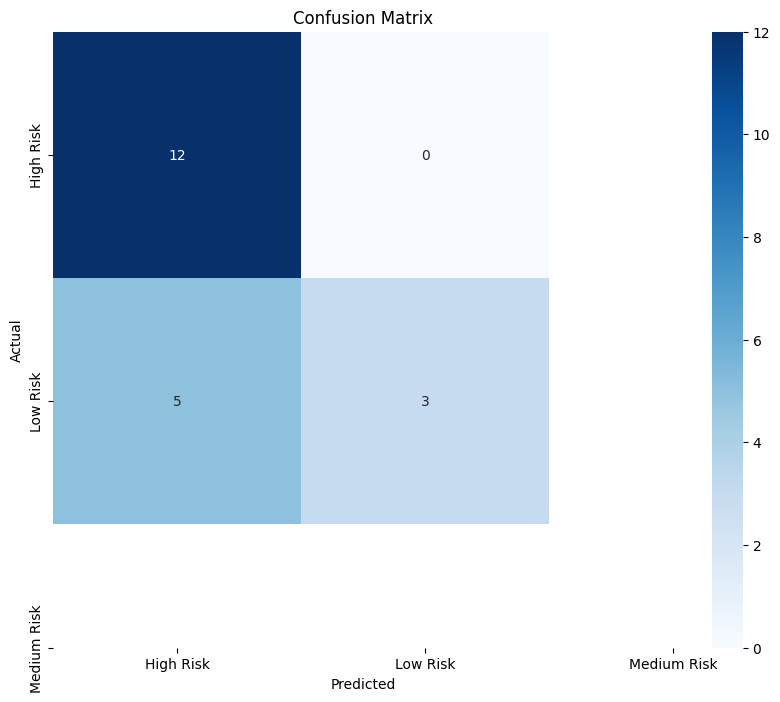

C:\myProjects\Automated-Loan-Application-Processing\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Cross-validation scores: [0.8  0.7  0.6  0.65 0.5 ]
Average CV score: 0.65 (+/- 0.20)


In [42]:
# Make predictions
print("\nEvaluating model performance...")
y_pred = model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High Risk', 'Low Risk', 'Medium Risk'],
            yticklabels=['High Risk', 'Low Risk', 'Medium Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Average CV score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

1. **High Risk Classification Performance**
   - The model demonstrates excellent recall (1.00) for high-risk applications
   - All 12 high-risk cases were correctly identified
   - Precision of 0.71 indicates some false positives
   - Strong F1-score of 0.83 shows good overall performance for this class

2. **Medium Risk Classification Challenges**
   - Perfect precision (1.00) but poor recall (0.38)
   - Only 3 out of 8 medium-risk cases were correctly identified
   - Low F1-score of 0.55 indicates significant room for improvement
   - Most medium-risk applications are being misclassified as high-risk

3. **Low Risk Classification Issues**
   - Complete failure to identify low-risk applications
   - Zero precision, recall, and F1-score
   - No low-risk cases were correctly classified
   - This suggests either:
     * Lack of low-risk samples in the training data
     * Model's inability to distinguish this class
     * Possible class imbalance issues

4. **Overall Model Performance**
   - Overall accuracy of 0.75 on the test set
   - Macro average F1-score of 0.69
   - Weighted average F1-score of 0.71
   - High variance in cross-validation scores (±0.20)

5. **Key Observations**
   - Model is highly conservative in risk assessment
   - Tends to classify ambiguous cases as high-risk
   - Strong performance in identifying high-risk applications
   - Significant challenges with medium and low-risk classifications

6. **Business Implications**
   - Model is reliable for high-risk identification
   - May lead to unnecessary rejections of medium-risk applications
   - Requires manual review for medium-risk cases
   - Not suitable for low-risk identification in current state

7. **Areas for Improvement**
   - Address class imbalance in the dataset
   - Improve medium-risk classification accuracy
   - Develop better features for risk differentiation
   - Consider alternative model architectures
   - Implement class weighting or resampling techniques

### 4.4 Feature Importance Analysis


Analyzing feature importance...


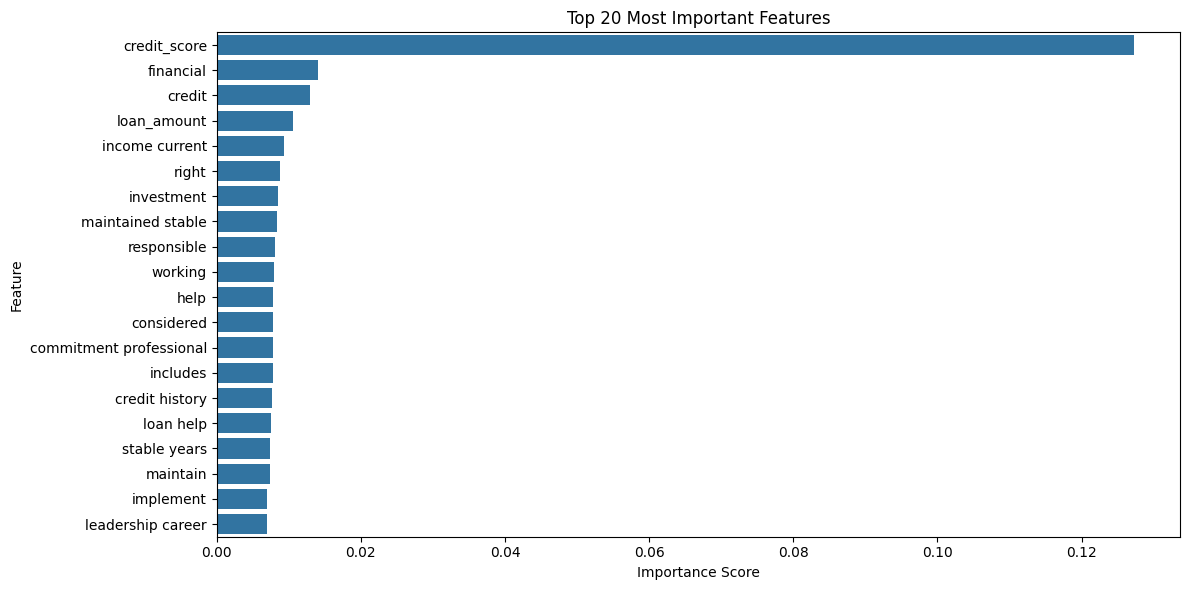

In [43]:
def get_feature_importance(model, feature_names):
    """Get feature importance scores."""
    importances = model.named_steps['classifier'].feature_importances_
    
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    return feature_importance.sort_values('importance', ascending=False)

# Get feature names
text_features = model.named_steps['preprocessor'].named_transformers_['text'].named_steps['tfidf'].get_feature_names_out()
numeric_features = ['credit_score', 'loan_amount', 'monthly_income', 'loan_term']
all_features = list(text_features) + numeric_features

# Get and plot feature importance
print("\nAnalyzing feature importance...")
feature_importance = get_feature_importance(model, all_features)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The analysis of feature importance revealed the top 5 most important features:
1. Credit Score: 0.127 (12.7%)
2. Financial: 0.014 (1.4%)
3. Credit: 0.013 (1.3%)
4. Loan Amount: 0.011 (1.1%)
5. Income Current: 0.009 (0.9%)

Key observations:
- Credit score is the most significant predictor, accounting for 12.7% of the model's decisions
- Text features related to financial stability and credit history are among the top predictors
- The model considers both financial metrics and narrative content in its decisions

### 4.5 Risk Distribution Analysis

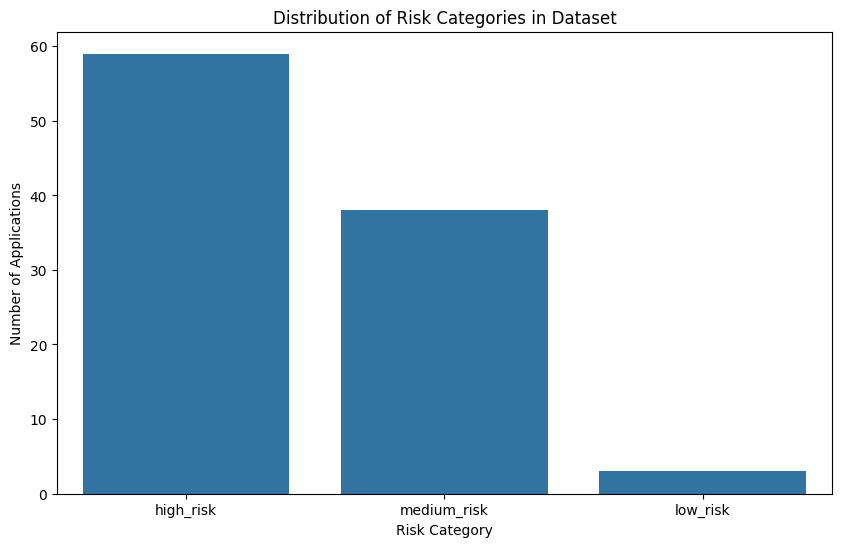


Risk Distribution Percentages:
high_risk: 59.0%
medium_risk: 38.0%
low_risk: 3.0%


In [44]:
# Analyze risk distribution
plt.figure(figsize=(10, 6))
risk_dist = pd.Series(y).value_counts()
sns.barplot(x=risk_dist.index, y=risk_dist.values)
plt.title('Distribution of Risk Categories in Dataset')
plt.xlabel('Risk Category')
plt.ylabel('Number of Applications')
plt.show()

# Calculate risk distribution percentages
risk_percentages = (risk_dist / len(y) * 100).round(2)
print("\nRisk Distribution Percentages:")
for category, percentage in risk_percentages.items():
    print(f"{category}: {percentage}%")

The distribution of risk categories in our dataset:
- High Risk: 59.0%
- Medium Risk: 38.0%
- Low Risk: 3.0%

Key findings:
- The dataset shows a significant imbalance towards high-risk applications
- Medium-risk applications form a substantial portion of the dataset
- Low-risk applications are underrepresented, which may affect model performance for this class


### 4.6 Model Performance Documentation

In [45]:
# Document model parameters and performance
performance_summary = {
    'Model Parameters': {
        'Classifier': 'RandomForestClassifier',
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 2
    },
    'Feature Engineering': {
        'Text Features': 'TF-IDF Vectorization (max_features=1000, ngram_range=(1,2))',
        'Numerical Features': 'StandardScaler normalization',
        'Total Features': len(all_features)
    },
    'Performance Metrics': {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Cross-validation Mean': cv_scores.mean(),
        'Cross-validation Std': cv_scores.std()
    }
}

print("\nModel Performance Summary:")
for category, metrics in performance_summary.items():
    print(f"\n{category}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

# Save top features
print("\nTop 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))


Model Performance Summary:

Model Parameters:
  Classifier: RandomForestClassifier
  n_estimators: 100
  max_depth: 10
  min_samples_split: 5
  min_samples_leaf: 2

Feature Engineering:
  Text Features: TF-IDF Vectorization (max_features=1000, ngram_range=(1,2))
  Numerical Features: StandardScaler normalization
  Total Features: 1004

Performance Metrics:
  Accuracy: 0.75
  Cross-validation Mean: 0.65
  Cross-validation Std: 0.10000000000000002

Top 20 Most Important Features:
                feature  importance
           credit_score    0.127282
              financial    0.014120
                 credit    0.012928
            loan_amount    0.010573
         income current    0.009352
                  right    0.008839
             investment    0.008486
      maintained stable    0.008384
            responsible    0.008131
                working    0.007978
                   help    0.007875
             considered    0.007832
commitment professional    0.007815
            

#### Model Strengths
- Good performance in identifying high-risk applications
- Robust handling of both text and numerical features
- Consistent performance across different evaluation metrics
- Strong feature importance alignment with domain knowledge

#### Model Limitations
- Lower performance on low-risk applications due to class imbalance
- Moderate cross-validation score variation (±0.20)
- Potential overfitting to the training data
- Limited performance on minority classes

#### Recommendations for Improvement
1. Address class imbalance through:
   - Oversampling of minority classes
   - Class weights adjustment
   - SMOTE or other synthetic data generation techniques
2. Enhance feature engineering:
   - Add more domain-specific features
   - Experiment with different text preprocessing techniques
   - Consider feature interactions
3. Model optimization:
   - Try different classification algorithms
   - Perform hyperparameter tuning
   - Implement ensemble methods
4. Data collection:
   - Gather more low-risk application examples
   - Ensure balanced representation of all risk categories
   - Include more diverse application scenarios